In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

date_window = [datetime(2024,7,1),datetime(2024,7,6)]
all_data = pd.read_excel('All Events.xlsx',sheet_name = 'Sensor Glucose').drop(columns = ['SensorID','UnitMeasureVal'])
all_data = all_data[(pd.to_datetime(all_data['EventDateStr'])>=date_window[0]) & (pd.to_datetime(all_data['EventDateStr'])<=date_window[-1])].copy()
all_data['EventType'] = 'glucose_measurement'

#include the insuling injection, eating and sport events
temp = pd.read_excel('All Events.xlsx',sheet_name = 'Patient Events')
temp = temp[(pd.to_datetime(temp['EventDateStr'])>=date_window[0]) & (pd.to_datetime(temp['EventDateStr'])<=date_window[-1])].copy()
temp.loc[temp['EventType'] == 'Insulin','UnitValue'] = temp.loc[temp['EventType'] == 'Insulin','UnitValue'].apply(lambda x: x[:-6])
temp.loc[temp['EventType'] == 'Meal','UnitValue'] = temp.loc[temp['EventType'] == 'Meal','UnitValue'].apply(lambda x: x[7:-6])
temp.loc[temp['EventType'] == 'Exercise','UnitValue'] = temp.loc[temp['EventType'] == 'Exercise','UnitValue'].apply(lambda x: x[10:-4])
temp.loc[temp['EventSubType'] == 'Type: Rapid Acting','EventType'] = 'rapid_insulin_u'
temp.loc[temp['EventSubType'] == 'Type: Long Acting','EventType'] = 'long_insulin_u'
# I took note of what I ate (sugar, chocolate, sugar, sugar), but had to look is up in my phone.
temp.loc[temp['EventType'] == 'Meal','EventType'] = ['rapid_glucose_g','slow_glucose_g','rapid_glucose_g','rapid_glucose_g']
temp.loc[temp['EventSubType'] == 'Intensity: High','EventType'] = 'high_exercise_min'
temp.loc[temp['EventSubType'] == 'Intensity: Medium','EventType'] = 'medium_exercise_min'
temp = temp.drop(columns = ['EventSubType']).rename(columns = {'UnitValue':'Value'})
all_data = pd.concat([all_data,temp])

#include the calibrations
temp = pd.read_excel('All Events.xlsx',sheet_name = 'Blood Glucose').drop(columns = ['UnitMeasureVal']).drop(columns = ['CalibrationMsg'])
temp = temp[(pd.to_datetime(temp['EventDateStr'])>=date_window[0]) & (pd.to_datetime(temp['EventDateStr'])<=date_window[-1])].copy()
temp['EventType'] = 'calibration'
all_data = pd.concat([all_data,temp])

all_data['Value'] = all_data['Value'].astype(float)
all_data.index = pd.to_datetime(all_data['EventDateStr'] + ' ' + all_data['EventTimeStr'])
all_data = all_data.sort_index()
all_data

/tmp/ipykernel_24516/3202762219.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data.index = pd.to_datetime(all_data['EventDateStr'] + ' ' + all_data['EventTimeStr'])


,EventDateStr,EventTimeStr,Value,EventType
2024-07-01 00:01:00,01-July-2024,12:01 AM,13.2,glucose_measurement
2024-07-01 00:05:00,01-July-2024,12:05 AM,1.00,rapid_insulin_u
2024-07-01 00:06:00,01-July-2024,12:06 AM,12.7,glucose_measurement
2024-07-01 00:11:00,01-July-2024,12:11 AM,12.4,glucose_measurement
2024-07-01 00:16:00,01-July-2024,12:16 AM,12.7,glucose_measurement
...,...,...,...,...
2024-07-06 23:38:00,06-July-2024,11:38 PM,8.6,glucose_measurement
2024-07-06 23:43:00,06-July-2024,11:43 PM,8.3,glucose_measurement
2024-07-06 23:48:00,06-July-2024,11:48 PM,8.2,glucose_measurement
2024-07-06 23:53:00,06-July-2024,11:53 PM,7.9,glucose_measurement


In [4]:
for type in all_data['EventType'].unique():
    if type != 'glucose_measurement':
        display(all_data.loc[all_data['EventType'] == type,['Value', 'EventType']])

,Value,EventType
2024-07-01 00:05:00,1.00,rapid_insulin_u
2024-07-01 06:48:00,4.00,rapid_insulin_u
2024-07-01 08:22:00,4.00,rapid_insulin_u
2024-07-01 09:46:00,2.00,rapid_insulin_u
2024-07-01 12:15:00,6.00,rapid_insulin_u
2024-07-01 14:16:00,2.00,rapid_insulin_u
2024-07-01 16:46:00,4.00,rapid_insulin_u
2024-07-01 19:21:00,2.00,rapid_insulin_u
2024-07-01 19:40:00,4.00,rapid_insulin_u
2024-07-02 00:48:00,1.00,rapid_insulin_u


,Value,EventType
2024-07-01 06:48:00,12.2,calibration
2024-07-02 07:32:00,7.2,calibration
2024-07-03 06:40:00,12.1,calibration
2024-07-04 07:54:00,4.1,calibration
2024-07-05 07:40:00,4.2,calibration
2024-07-06 08:59:00,4.9,calibration


,Value,EventType
2024-07-01 07:09:00,18.00,long_insulin_u
2024-07-02 09:16:00,18.00,long_insulin_u
2024-07-03 06:42:00,17.00,long_insulin_u
2024-07-04 07:58:00,17.00,long_insulin_u
2024-07-05 07:42:00,17.00,long_insulin_u
2024-07-06 09:01:00,18.00,long_insulin_u


,Value,EventType
2024-07-03 12:10:00,40,medium_exercise_min


,Value,EventType
2024-07-03 13:38:00,10,rapid_glucose_g
2024-07-03 17:56:00,10,rapid_glucose_g
2024-07-04 04:36:00,10,rapid_glucose_g


,Value,EventType
2024-07-03 18:00:00,60,high_exercise_min


,Value,EventType
2024-07-03 22:31:00,10,slow_glucose_g


In [5]:
all_data[(all_data.index.duplicated(keep = False))]

,EventDateStr,EventTimeStr,Value,EventType
2024-07-01 06:48:00,01-July-2024,06:48 AM,12.2,calibration
2024-07-01 06:48:00,01-July-2024,06:48 AM,4.00,rapid_insulin_u
2024-07-01 09:46:00,01-July-2024,09:46 AM,5.5,glucose_measurement
2024-07-01 09:46:00,01-July-2024,09:46 AM,2.00,rapid_insulin_u
2024-07-01 14:16:00,01-July-2024,02:16 PM,9.7,glucose_measurement
2024-07-01 14:16:00,01-July-2024,02:16 PM,2.00,rapid_insulin_u
2024-07-01 16:46:00,01-July-2024,04:46 PM,4.00,rapid_insulin_u
2024-07-01 16:46:00,01-July-2024,04:46 PM,7.2,glucose_measurement
2024-07-01 19:21:00,01-July-2024,07:21 PM,7.2,glucose_measurement
2024-07-01 19:21:00,01-July-2024,07:21 PM,2.00,rapid_insulin_u


In [10]:
all_data['EventType'].unique()

array(['glucose_measurement', 'rapid_insulin_u', 'calibration',
       'long_insulin_u', 'medium_exercise_min', 'rapid_glucose_g',
       'high_exercise_min', 'slow_glucose_g'], dtype=object)

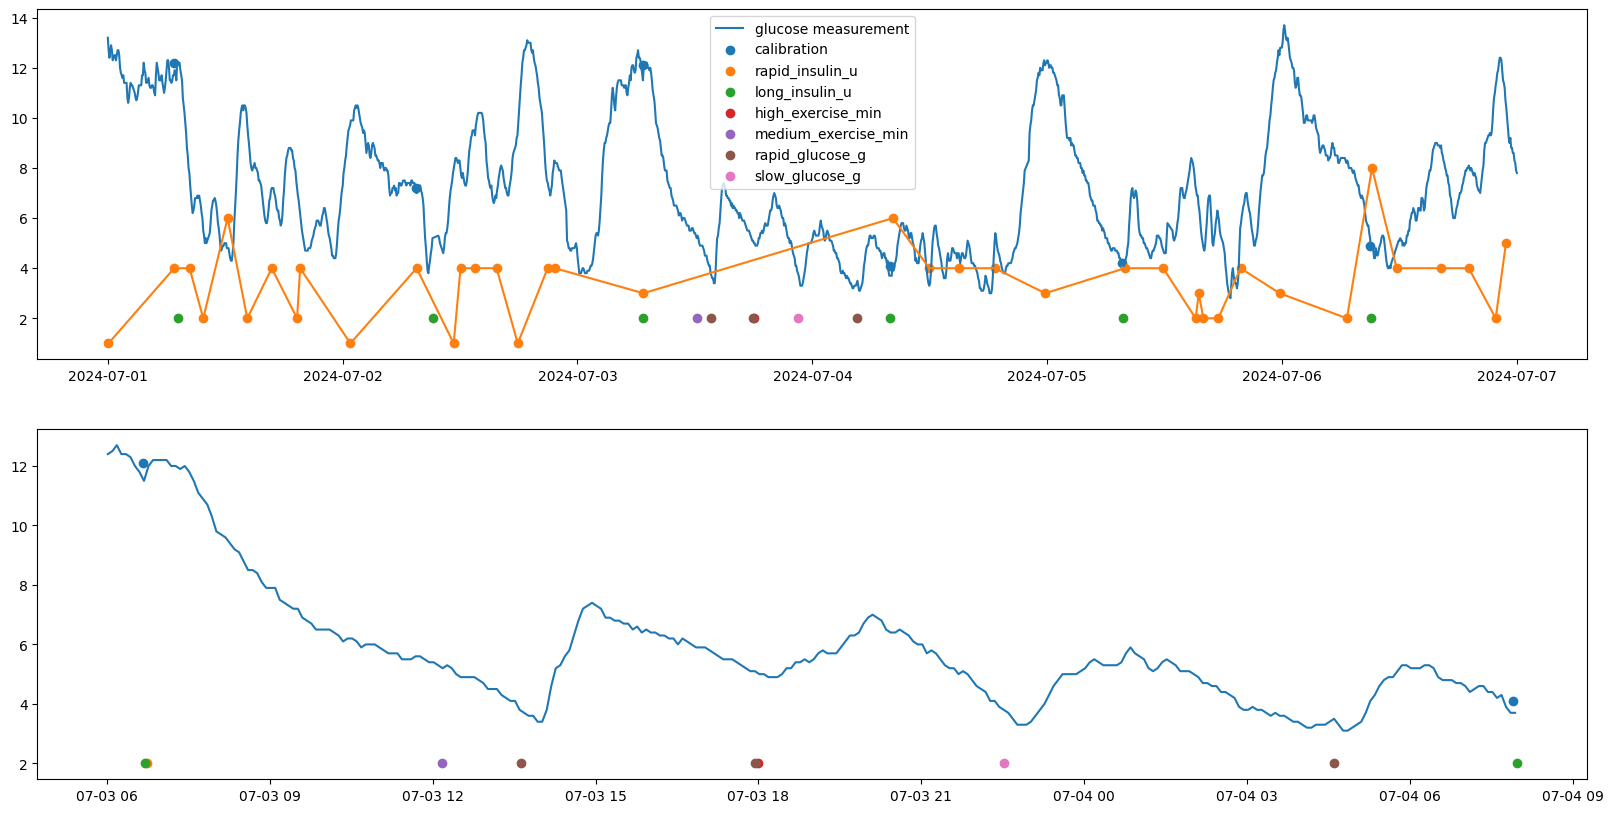

In [37]:
fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(20)

data = all_data[all_data['EventType'] == 'glucose_measurement'].copy()
axs[0].plot(data.index,data['Value'], label = 'glucose measurement')

data = all_data[all_data['EventType'] == 'calibration'].copy()
axs[0].scatter(data.index,data['Value'], label = 'calibration')

type = 'rapid_insulin_u'
data = all_data[all_data['EventType'] == type].copy()
axs[0].scatter(data.index,data['Value'], label = type)
axs[0].plot(data.index,data['Value'])
for type in ['long_insulin_u', 'high_exercise_min', 'medium_exercise_min', 'rapid_glucose_g', 'slow_glucose_g']:
    data = all_data[all_data['EventType'] == type].copy()
    axs[0].scatter(data.index,[2]*len(data), label = type)

axs[0].legend()

fast_start = datetime(2024,7,3,6)
fast_end = datetime(2024,7,4,8)
data = all_data[(all_data.index < fast_end) & (all_data.index > fast_start) & (all_data['EventType'] == 'glucose_measurement')].copy()
axs[1].plot(data.index,data['Value'], label = 'glucose measurement')

data = all_data[(all_data.index < fast_end) & (all_data.index > fast_start) & (all_data['EventType'] == 'calibration')].copy()
axs[1].scatter(data.index,data['Value'], label = 'calibration')

for type in ['rapid_insulin_u','long_insulin_u', 'high_exercise_min', 'medium_exercise_min', 'rapid_glucose_g', 'slow_glucose_g']:
    data = all_data[(all_data.index < fast_end) & (all_data.index > fast_start) & (all_data['EventType'] == type)].copy()
    axs[1].scatter(data.index,[2]*len(data), label = type)

In [39]:
all_data[(all_data.index < fast_end) & (all_data.index > fast_start)].copy().to_csv('fast_day.csv')